# Production of alpha-tocopherol (vitamin E) in *Escherichia coli* 

## 1. Introduction

### 1.1 Literature review of the compound (<500 words) Daniel

### 1.2 Literature review of the cell factory (<500 words) Ben
Alpha-tocopherol has the ability to be produced within bacteria, by modifying the [InsertPathwayNameHere] using metabolic engineering. The cell factory which will be implemented for the production of Vitamin E is E. coli [InsertSpecificStrainHere]. E. coli is able to naturally produce the precursors to Vitamin E, therefor with the addition of a few enzymatic reactions and pathways, Vitamin E is able to be produced in E. coli. The overall process flow for enabling the production of Vitamin E in E. coli first begins with adding the additional enzymatic reactions to produce Vitamin E to the natural metabolic pathway of E. coli. Secondly optimization of the production of Vitamin E through modifications to the natural E. coli metabolic pathway as well as the added Vitamin E producing pathway. 

E. coli was chosen as the model bacteria for this cell factory, for a multitude of reasons. To begin with, E. coli is a very well documented and researched bacteria that has been used copious amounts of times to produce a large array of compounds. E. coli is also GRAS certified and has been used many times for production of these sorts of products, meaning it as able to be FDA and EMA approved, which is a crucial stamp of approval when producing compounds for human consumption. Some other advantageous qualities of E. coli include its; low cost, fast growth rates, high expression capabilities, and relatively simple downstream processing [1]. These attributes of E. coli are very important to consider when developing a cell factory, as they have a huge influence on the feasibility for future large scale industrial applications. 

Although E. coli seems to be a clear choice for cell factories because of all its advantages, it also has some disadvantages that need to be discussed and considered when determining the optimum cell factory design. When considering producing larger more complex compounds in E. coli, the simple mechanisms within E. coli gives it a low ability to perform post-translational modifications (PTMs). This can be quite problematic as PTMs are vital for the functionality of the proteins, however in this cell factory the product, Vitamin E, is a relatively simple compound and should not have any issues with PTMs. Another sometimes problematic quality of E. coli is its production of inclusion bodies. Inclusion bodies are insoluble clusters of proteins that are formed and remain in the cytoplasm of the cell, these inclusion bodies are formed as a result of misfolded proteins [2]. As these inclusion bodies remain within the cytoplasm, it causes the product purification to be more difficult, which can be a major deciding factor for industrial scale production. However as aforementioned, vitamin E is quite a simple compound and therefore misfolded proteins should not be an issue, but an understanding of this phenomenon is important for solving potential issues in regards to expression levels of the desired product.

## 2. Problem definition (<300 words) Kaare

The goal of the project is to come up with an engineering strategy for the heterologous production of Vitamin E (tocochromanols/-trienols) in *E. coli* through the adaption and use of a verified genome-scale metabolic model (GSM). The modelling decisions should be informed by the need of the bioprocess to be GMP-compatible, e.g. by the use of glucose as the main carbon souce. Currently, only precursors of this class of molecules of interest have been produced, in insufficient titers for real-world use, and at slow rates. We hope to be able to contribute suggestions for an engineering strategy that can improve the titer and productivity of the process.


## 3. *If Project category II:* Selection and assessment of existing GSM (<500 words) Joachim

- In case there were multiple different GSMs available for your host, how did you choose?
- Do you expect it to facilitate reliable predictions based on its publication and experimental validation?
- Do you expect it to facilitate reliable predictions based on your assessment (memote, other considerations)?


## 4. Computer-Aided Cell Factory Engineering (<1500 words if Category II project)

As the first step, the alpha-tocopherol pathway was added to the chosen GSM (iML1515). The pathway and model were chosen based on the verifiability of the enzymes involved and the .... respectively. The pathway requires the addition of seven reactions to the wildtype GSM: five pathway reactions and two reactions to generate co-factors. The pathway is based on the KEGG PATHWAY map of the vitamin E biosynthesis section from the *E. coli*. The metabolites and reactions were added to the iML1515-model using the cobrapy library. The full pathway is shown in figure X?. 

![Overview of alpha-tocopherol biosynthesis pathway](/Vitamin%20E%20biosynthesis%20pathway.png "Overview of alpha-tocopherol biosynthesis pathway")

In [7]:
import cobra
from cobra.io import read_sbml_model, write_sbml_model
from cobra import Metabolite, Reaction

In [4]:
WT_model = read_sbml_model('iML1515.xml')

The first branch of the native *E. coli* metabolism, is the conversion of 3-(4-hydroxyphenyl)pyruvate to homogentisate and CO2: 

In [ ]:
# Reaction 1: 3-(4-Hydroxyphenyl)pyruvate + O2 O2 --> CO2 CO2 + Homogentisate
new_reaction1 = Reaction('34HPPOR') # 4 Hydroxyphenylpyruvateoxygen oxidoreductase
homogentisate = Metabolite(
    id='hgentis_c', 
    formula = 'C8H8O4',
    compartment='c')
new_reaction1.add_metabolites({model.metabolites.get_by_id('34hpp_c'): -1, # 3-(4-Hydroxyphenyl)pyruvate
                               model.metabolites.o2_c: -1, #O2
                               homogentisate: 1, # Homogentisate
                               model.metabolites.co2_c: 1, # CO2
                              })
model.add_reactions([new_reaction1])

The rest of the pathway was added in the same way, and the new model was written to an XML-file. This was done for both pathways leading to alpha-tocopherol, although the enzyme catalyzing the conversion of beta-tocopherol to alpha-tocoperol (pathway #2 in figure X?) is not well-characterized. For this reason, the further work was based upon the model going through route #1, although the two were compared initially.


In [23]:
model = read_sbml_model('model_atocopherol.xml')

In [18]:
model_2 = read_sbml_model('model_atocopherol_2.xml')

### Characterization of basic models

The theoretical maximum productivity and yield of the two routes were calculated. These are calculated on the assumption that no carbon is used to generate biomass, thus they represent the boundaries of the process as it currently is, not actual attainable figures. The productivity is the flux through the reaction generating alpha-tocopherol (DM_avite_c) and the yield is just this flux divided by the glucose uptake rate (as this is the only carbon source in the model).

In [19]:
from cobra import Reaction, Metabolite
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

First the values are calculated for route 1:

In [24]:
model.objective = model.reactions.DM_avite1_c
avite_production = model.optimize().objective_value
theor_yield = avite_production / (-1*model.reactions.EX_glc__D_e.flux)
print("Max. alpha-tocopherol productivity [mmol gDW^-1 h^-1]:", avite_production)
print("Max. theoretical yield [mmol-put / mmol-glc]:", theor_yield)

Max. alpha-tocopherol productivity [mmol gDW^-1 h^-1]: 1.2228500311138757
Max. theoretical yield [mmol-put / mmol-glc]: 0.12228500311138757


Since alpha-tocopherol has a molecular mass of 430.7 g/mol this translates to approximately 0.526 g of product per gDCW per hour, and a yield of a little more than 12%.

Then for route 2:

In [25]:
model_2.objective = model_2.reactions.DM_avite1_c
avite_production = model_2.optimize().objective_value
theor_yield = avite_production / (-1*model_2.reactions.EX_glc__D_e.flux)
print("Max. alpha-tocopherol productivity [mmol gDW^-1 h^-1]:", avite_production)
print("Max. theoretical yield [mmol-put / mmol-glc]:", theor_yield)

Max. alpha-tocopherol productivity [mmol gDW^-1 h^-1]: 1.2966809633784213
Max. theoretical yield [mmol-put / mmol-glc]: 0.12966809633784213


For this model the maximal theoretical productivity yield is slighter higher, at 1.297 [mmol gDW^-1 h^-1] (558 g product per DW per hour) and almost 13%, respectively.

## Phenotypic phase plane

Product formation and biomass generation both require carbon, and maximizing one, will thus minimize the other. This is clearly seen when plotting the phenotypic phase plane of biomass against vitamin E productivity:

In [16]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

<AxesSubplot: title={'center': 'alpha-tocopherol production as a function of tyrosine exchange reaction'}, xlabel='EX_tyr__L_e'>

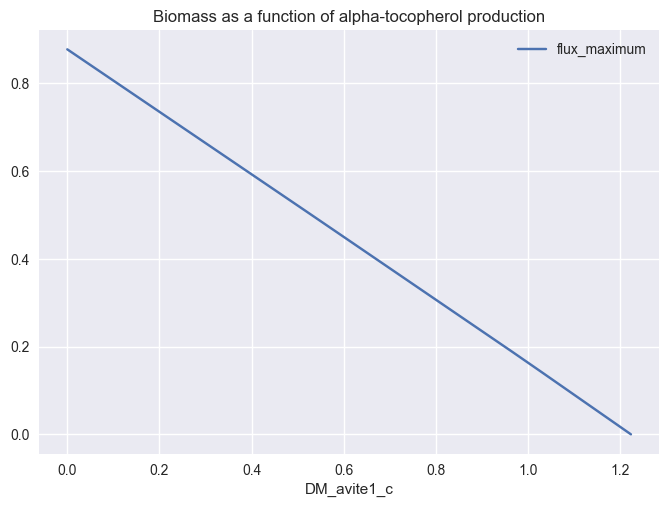

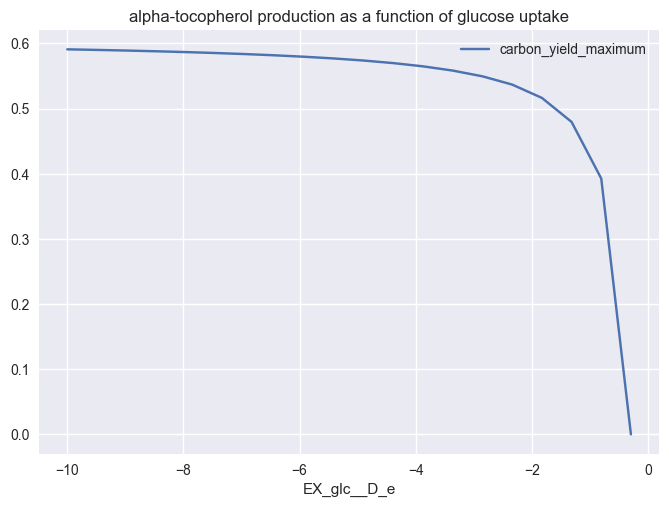

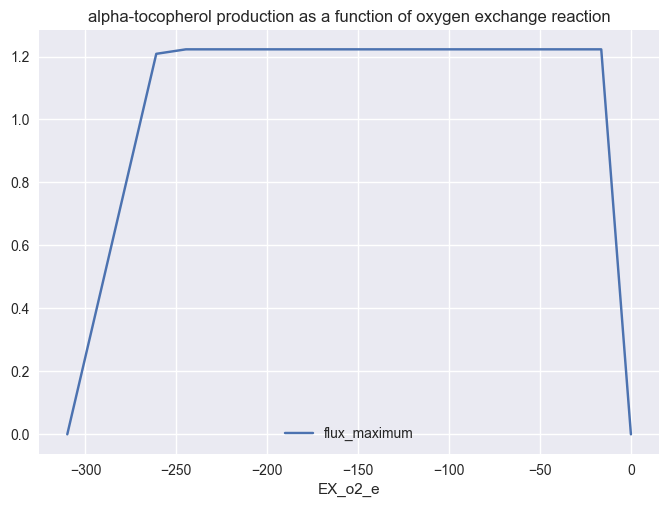

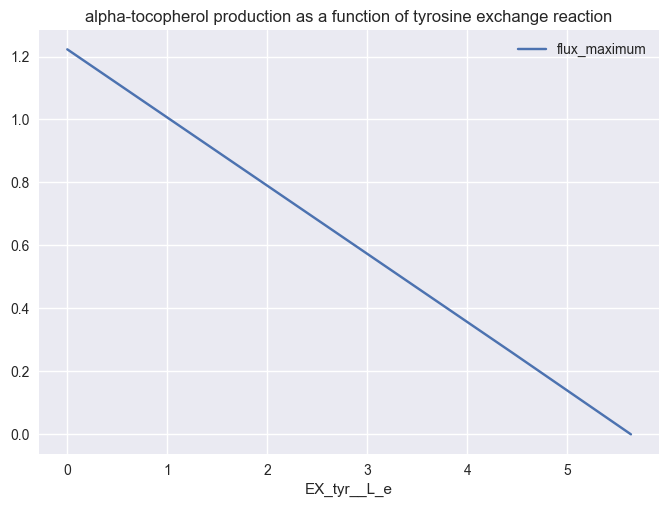

In [35]:
ppp_BIOMASS = production_envelope(model,
            reactions=[model.reactions.DM_avite1_c],
            objective=model.reactions.BIOMASS_Ec_iML1515_core_75p37M)
ppp_avite = production_envelope(model,
            reactions=[model.reactions.EX_glc__D_e],
            objective=model.reactions.DM_avite1_c)
ppp_o2 = production_envelope(model,
            reactions=[model.reactions.EX_o2_e],
            objective=model.reactions.DM_avite1_c)
ppp_tyr = production_envelope(model,
            reactions=[model.reactions.EX_tyr__L_e],
            objective=model.reactions.DM_avite1_c)

ppp_BIOMASS.plot(x='DM_avite1_c', y='flux_maximum', title = 'Biomass as a function of alpha-tocopherol production' ) #carbon yield of biomass as function of glucose uptake
ppp_avite.plot(x='EX_glc__D_e', y='carbon_yield_maximum', title = 'alpha-tocopherol production as a function of glucose uptake') #carbon yield of putrescine as function of glucose uptake
ppp_o2.plot(x='EX_o2_e', y='flux_maximum', title = 'alpha-tocopherol production as a function of oxygen exchange reaction')
ppp_tyr.plot(x='EX_tyr__L_e', y='flux_maximum', title = 'alpha-tocopherol production as a function of tyrosine exchange reaction')

What are we doing?:

Testing and optimizing flux through the only experimentally verified enzyme pathway. 

No knockouts have been found, 

## 5. Discussion (<500 words)

## 6. Conclusion (<200 words)

## References